In [1]:
from __future__ import print_function
import os
import sys
sys.path.append('../')
%matplotlib inline

In [2]:
import local_env
import utils.service as us
import utils.viewer as uv
reload(us)
reload(uv)
from utils.service import ClusterService
from utils.viewer import ClusterViewer

---
#### ENV VARS

In [3]:
None==os.environ.get('table')

True

In [4]:
local_env.export()


EXPORTING dev ENV:
	width: 5
	iterations: 25
	csv_bucket: gfw-clusters-test
	url: http://wri-tiles.s3.amazonaws.com/glad_prod/tiles
	min_count: 25
	bucket: wri-tiles
	zoom: 12




In [5]:
os.environ.get('table')

---
### ClusterService

In [6]:
drc_bounds=[[12.1823368669, -13.2572266578], [31.1741492042, 5.25608775474]]

In [7]:
c=ClusterService(bounds=drc_bounds)
c.request_size()

46221

In [8]:
%time c.run()
print('NB ERRORS:',c.errors().shape[0])
print('NB CLUSTERS:',c.dataframe().shape[0])

CPU times: user 2min 57s, sys: 34.9 s, total: 3min 32s
Wall time: 31min 27s
NB ERRORS: 9323
NB CLUSTERS: 107928


In [9]:
filename=c.name()
print('FILE WILL BE SAVED TO: {}'.format(filename))
%time c.save()

FILE WILL BE SAVED TO: clusters_2015-01-01:2025-01-01_2186:1988:2402:2200_12:5:25:25
CPU times: user 13.8 s, sys: 2.7 s, total: 16.5 s
Wall time: 1min 47s


In [10]:
print("DATAFRAME: ")
c.dataframe().sample(5)

DATAFRAME: 


,count,area,min_date,max_date,longitude,latitude,x,y,timestamp
88094,73,391,20150506,20171204,-6.980484,23.232077,2312,2127,20180208::00:34:33
3738,113,799,20150412,20170721,-0.761007,24.205767,2323,2056,20180208::00:51:36
43658,88,498,20150309,20180127,2.443652,23.054228,2310,2020,20180208::00:40:38
74901,53,472,20150513,20170922,-3.385436,23.257238,2312,2086,20180208::00:36:09
2027,98,788,20150506,20171110,-2.294194,24.102367,2322,2074,20180208::00:54:04


In [11]:
print("ERRORS: ")
c.errors().head()

ERRORS: 


,index,z,x,y,centroid_longitude,centroid_latitude,error,error_trace
0,0,12,2186,1995,12.173024,4.609106,"Could not connect to the endpoint URL: ""https:...",service.1
1,1,12,2186,1996,12.173024,4.521495,"Could not connect to the endpoint URL: ""https:...",service.1
2,2,12,2186,2100,12.173024,-4.609450,"Could not connect to the endpoint URL: ""https:...",service.1
3,3,12,2186,2101,12.173024,-4.697051,"Could not connect to the endpoint URL: ""https:...",service.1
4,4,12,2186,2102,12.173024,-4.784641,"Could not connect to the endpoint URL: ""https:...",service.1


In [12]:
c.errors().tail()

,index,z,x,y,centroid_longitude,centroid_latitude,error,error_trace
9318,9318,12,2402,2196,31.157399,-12.940490,http://wri-tiles.s3.amazonaws.com/glad_prod/ti...,handler.2
9319,9319,12,2402,2197,31.157399,-13.026134,http://wri-tiles.s3.amazonaws.com/glad_prod/ti...,handler.2
9320,9320,12,2402,2198,31.157399,-13.111748,http://wri-tiles.s3.amazonaws.com/glad_prod/ti...,handler.2
9321,9321,12,2402,2199,31.157399,-13.197332,http://wri-tiles.s3.amazonaws.com/glad_prod/ti...,handler.2
9322,9322,12,2402,2200,31.157399,-13.282887,http://wri-tiles.s3.amazonaws.com/glad_prod/ti...,handler.2


In [13]:
del(c)

---
# ERRORS

In [45]:
reload(us)
reload(uv)
from utils.service import ClusterService
from utils.viewer import ClusterViewer
import numpy as np

In [46]:
%time c=ClusterService.read(filename)

CPU times: user 8.16 s, sys: 645 ms, total: 8.81 s
Wall time: 17.5 s


In [47]:
c.dataframe().sample(5)

,count,area,min_date,max_date,longitude,latitude,x,y,timestamp
39529,43,374,20150414,20180131,3.922025,28.769531,2375,2003,20180208::00:41:12
67290,53,322,20150214,20180120,4.544859,24.925437,2331,1996,20180208::00:37:10
102425,54,282,20150407,20171012,-0.774793,17.626723,2248,2056,20180208::00:32:46
104872,31,72,20150930,20171215,-3.276361,17.105928,2242,2085,20180208::00:32:22
78748,180,793,20150205,20180103,3.717403,22.673713,2305,2005,20180208::00:35:41


In [48]:
c.errors().head()

,index,z,x,y,centroid_longitude,centroid_latitude,error,error_trace
0,0,12,2186,1995,12.173024,4.609106,"Could not connect to the endpoint URL: ""https:...",service.1
1,1,12,2186,1996,12.173024,4.521495,"Could not connect to the endpoint URL: ""https:...",service.1
2,2,12,2186,2100,12.173024,-4.609450,"Could not connect to the endpoint URL: ""https:...",service.1
3,3,12,2186,2101,12.173024,-4.697051,"Could not connect to the endpoint URL: ""https:...",service.1
4,4,12,2186,2102,12.173024,-4.784641,"Could not connect to the endpoint URL: ""https:...",service.1


In [49]:
E_BADCONNECTION="Could not connect"
E_TILEDOESNOTEXIST='png not found'
E_TIMEOUT='2018-02-08T'
E_INVALIDSIG='InvalidSignatureException'

In [50]:
connection_died_errors=c.errors()[c.errors().error.str.contains(E_BADCONNECTION)]
print("BAD CONNECTION ERRORS:",connection_died_errors.shape[0])
connection_died_errors.head()

BAD CONNECTION ERRORS: 2423


,index,z,x,y,centroid_longitude,centroid_latitude,error,error_trace
0,0,12,2186,1995,12.173024,4.609106,"Could not connect to the endpoint URL: ""https:...",service.1
1,1,12,2186,1996,12.173024,4.521495,"Could not connect to the endpoint URL: ""https:...",service.1
2,2,12,2186,2100,12.173024,-4.609450,"Could not connect to the endpoint URL: ""https:...",service.1
3,3,12,2186,2101,12.173024,-4.697051,"Could not connect to the endpoint URL: ""https:...",service.1
4,4,12,2186,2102,12.173024,-4.784641,"Could not connect to the endpoint URL: ""https:...",service.1


In [51]:
no_tile_errors=c.errors()[c.errors().error.str.contains(E_TILEDOESNOTEXIST)]
print("NO TILE (NOT AN ERROR) ERRORS:",no_tile_errors.shape[0])
no_tile_errors.head()

NO TILE (NOT AN ERROR) ERRORS: 6888


,index,z,x,y,centroid_longitude,centroid_latitude,error,error_trace
7,7,12,2186,2129,12.173024,-7.144670,http://wri-tiles.s3.amazonaws.com/glad_prod/ti...,handler.2
8,8,12,2186,2130,12.173024,-7.231870,http://wri-tiles.s3.amazonaws.com/glad_prod/ti...,handler.2
9,9,12,2186,2131,12.173024,-7.319053,http://wri-tiles.s3.amazonaws.com/glad_prod/ti...,handler.2
10,10,12,2186,2132,12.173024,-7.406219,http://wri-tiles.s3.amazonaws.com/glad_prod/ti...,handler.2
11,11,12,2186,2133,12.173024,-7.493367,http://wri-tiles.s3.amazonaws.com/glad_prod/ti...,handler.2


In [40]:
no_tile_errors=c.errors()[c.errors().error.str.contains(E_TILEDOESNOTEXIST)]
print("NO TILE (NOT AN ERROR) ERRORS:",no_tile_errors.shape[0])
no_tile_errors.head()

In [52]:
time_out_errors=c.errors()[c.errors().error.str.contains(E_TIMEOUT)]
print("TIMEOUT ERRORS:",time_out_errors.shape[0])
time_out_errors.head()

TIMEOUT ERRORS: 8


,index,z,x,y,centroid_longitude,centroid_latitude,error,error_trace
230,230,12,2189,2013,12.436696,3.030640,2018-02-08T00:48:30.110Z 15233c4c-0c69-11e8-ac...,service.2
3213,3213,12,2226,2042,15.688649,0.483220,2018-02-08T00:50:10.394Z 50e4a0d2-0c69-11e8-96...,service.2
3302,3302,12,2227,2037,15.776540,0.922639,2018-02-08T00:58:44.309Z 83344f24-0c6a-11e8-b1...,service.2
3380,3380,12,2228,2035,15.864430,1.098393,2018-02-08T00:47:02.651Z e0f959d3-0c68-11e8-9d...,service.2
3381,3381,12,2228,2036,15.864430,1.010517,2018-02-08T00:52:03.367Z 93fbc417-0c69-11e8-aa...,service.2


In [53]:
invalidsig_errors=c.errors()[c.errors().error.str.contains(E_INVALIDSIG)]
print("INVALID SIG ERRORS:",invalidsig_errors.shape[0])
invalidsig_errors.head()

INVALID SIG ERRORS: 4


,index,z,x,y,centroid_longitude,centroid_latitude,error,error_trace
390,390,12,2191,2084,12.612477,-3.206505,An error occurred (InvalidSignatureException) ...,service.1
1151,1151,12,2200,2151,13.403493,-9.058872,An error occurred (InvalidSignatureException) ...,service.1
2478,2478,12,2217,2006,14.897633,3.644828,An error occurred (InvalidSignatureException) ...,service.1
2595,2595,12,2218,2150,14.985524,-8.972068,An error occurred (InvalidSignatureException) ...,service.1


---
# VIEW TIMEOUTS

In [54]:
view=ClusterViewer(c)

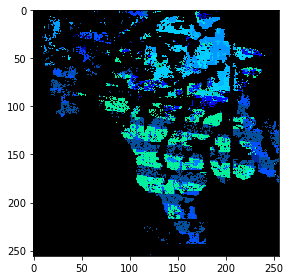

In [61]:
view.tile(z=12,x=2189,y=2013)

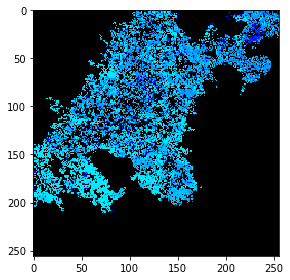

In [62]:
view.tile(z=12,x=2226,y=2042)

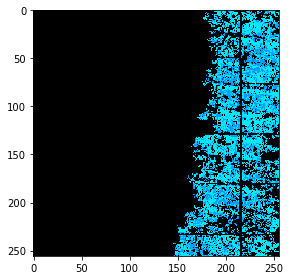

In [63]:
view.tile(z=12,x=2227,y=2037)